### Хайкова Светлана

6.1.25, 6.2.9, 6.5.9, 6.6.25, 6.9.25

In [2]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt
from IPython.display import Image

# Задача 6.1.25


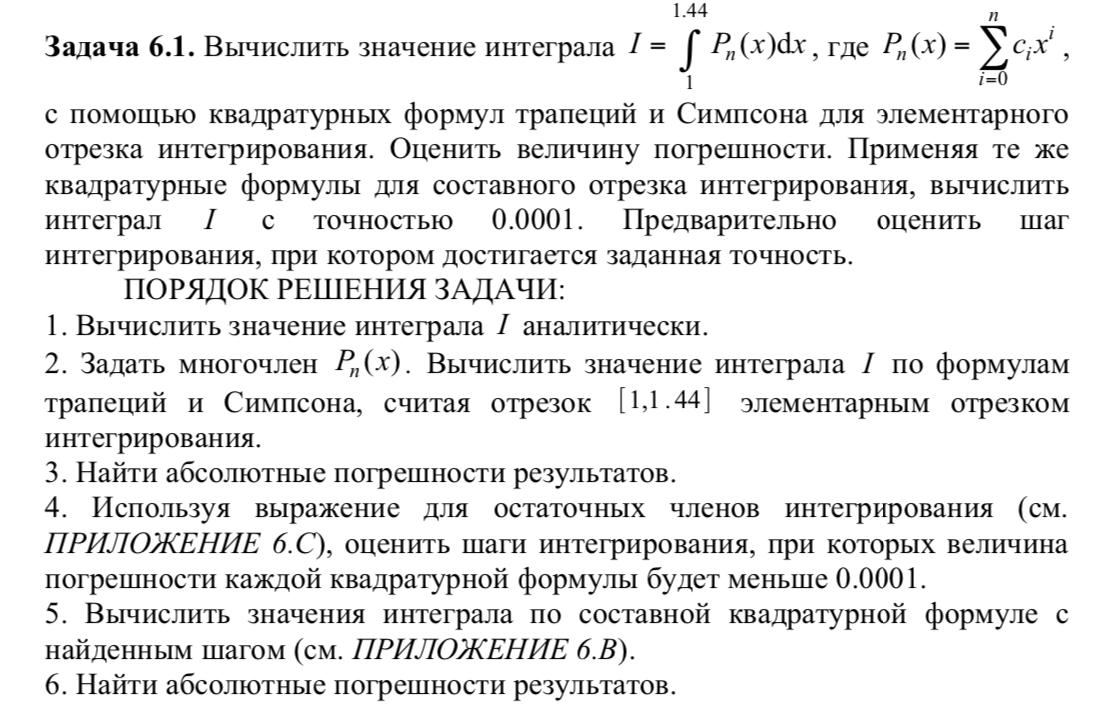

In [3]:
Image("l6t1.png")

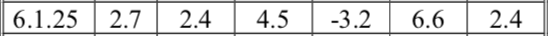

In [4]:
Image("l6t1v.png")

In [7]:
a, b = 1, 1.44
c = np.array([2.7, 2.4, 4.5, -3.2, 6.6, 2.4])

def P_n(x, c):
    return np.sum([c[i] * x**i for i in range(c.shape[0])])
print (P_n(1, c))

15.4


In [9]:
def Trapezoidal(f, a, b, h):
    '''Вычисляет значение интеграла функции f(x) на отрезке [a, b] методом трапеций
    h - шаг
    Возвращает значение интеграла'''
    x = np.linspace(a, b, round((b - a) / h) + 1)
    res = 0
    for i in range(x.shape[0] - 1):
        res += h / 2. * (f(x[i],c) + f(x[i + 1], c))
    return res

def Simpson(f, a, b, h):
    '''Вычисляет значение интеграла функции f(x) на отрезке [a, b] методом Симпсона
    h - шаг
    Возвращает значение интеграла'''
    ct = round((b - a) / h) + 1
    if ct % 2:
        ct += 1
    x = np.linspace(a, b, ct)
    res = 0
    for i in range(x.shape[0] - 1):
        res += h / 6. * (f(x[i], c) + 4 * f((x[i] + x[i + 1]) /2., c) + f(x[i + 1], c))
    return res

res_tr = Trapezoidal(P_n, a, b, b - a)
res_s = Simpson(P_n, a, b, b - a)
res_true = 12.835
print (res_tr, abs(res_tr - res_true))
print (res_s, abs(res_s - res_true))

14.205622320947196 1.370622320947195
12.837893706035196 0.0028937060351950095


$$R_{tr} = \max_{1<=x<=1.44} {(|\frac{d^2f}{dx^2}|)}\frac{(b-a) h^2}{12}$$
$$\max_{1<=x<=1.44}{|\frac{d^2f}{dx^2}|} =288.908$$


$$R_s = \max_{1<=x<=1.44} {(|\frac{d^4f}{dx^4}|)}\frac{(b-a) h^4}{2880}$$
$$\max_{1<=x<=1.44}{|\frac{d^4f}{dx^4}|} = 573.12$$

In [11]:
h_tr = b - a
M2 = 288.908
while M2 * (b - a) * h_tr**2 / 12. >= 0.0001:
    h_tr /= 2.
h_tr

0.0017187499999999998

In [12]:
h_s = b - a
M4 = 573.12
while M4 * (b - a) * h_s**4 / 2880. >= 0.0001:
    h_s /= 2.
h_s

0.10999999999999999

In [13]:
res_tr = Trapezoidal(P_n, a, b, h_tr)
res_s = Simpson(P_n, a, b, h_s)
print (res_tr, abs(res_tr - res_true))
print (res_s, abs(res_s - res_true))

12.834995781453442 4.218546559187075e-06
16.043724199122323 3.2087241991223223


# Задача 6.2.9

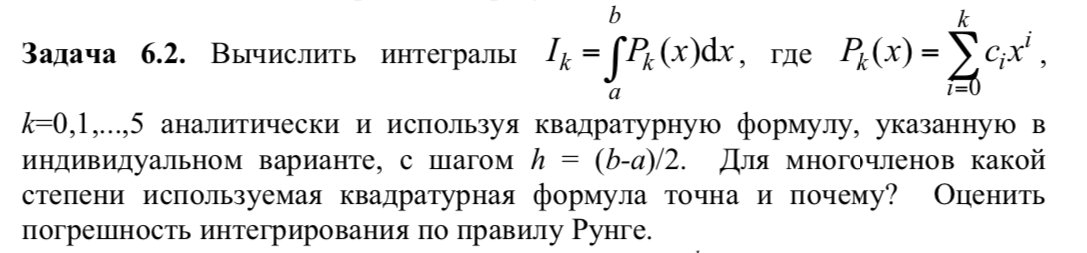

In [14]:
Image("l6t2.png")

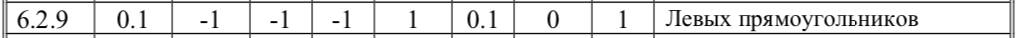

In [15]:
Image("l6t2v.png")

In [16]:
c = np.array([0.1, -1, -1, -1, 1, 0.1])
a, b = 0, 1
h = (b - a) / 2.
res_true = np.array([0.1, -0.4, -0.73333333, -0.98333333, -0.78333333, -0.76666667])
def P_n(x, c):
    return np.sum([c[i] * x**i for i in range(c.shape[0])])

In [17]:
def left_rect(f, h, c):
    x = np.arange(a, b + h, h)
    res = 0
    for i in range(x.shape[0] - 1):
        res += h * f(x[i], c)
    return res

res = []
for i in range(1, 7):
    res.append(left_rect(P_n, h, c[:i]))
res = np.array(res)
abs(res - res_true)

array([0.        , 0.25      , 0.45833333, 0.64583333, 0.47708333,
       0.46197917])

Данная квадратурная функция точна только для многочленов 0 степени (констант) так как мы на каждом участке предполагаем функцию константной и получаем высоту прямоугольника по одной точке

правило Рунге $$ \Delta _{{2n}}\approx \Theta |I_{{2n}}-I_{{n}}|$$

In [22]:
# точек было n --> стало 2n
# -->
h_new = (b - a) / 4.
res_2n = []
for k in range(1,7):
    res_2n.append(left_rect(P_n, h_new, c[:i]))
res_2n = np.array(res_2n)
[print('степень ' + str(i) + '--> погрешность = ' + str((1/3. * (abs(res_2n - res)))[i])) for i in range (res.shape[0])];

степень 0--> погрешность = 0.21064453125
степень 1--> погрешность = 0.12731119791666667
степень 2--> погрешность = 0.08564453125
степень 3--> погрешность = 0.06481119791666667
степень 4--> погрешность = 0.07522786458333333
степень 5--> погрешность = 0.07574869791666668


# Задача 6.5.9

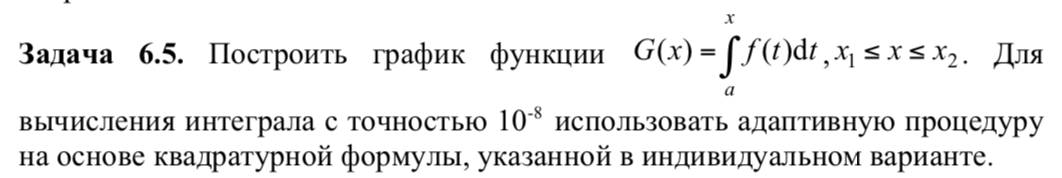

In [23]:
Image("l6t3.png")

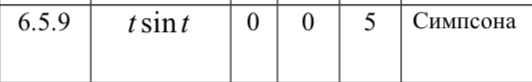

In [24]:
Image("l5t3v.png")

/Users/strizh78/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


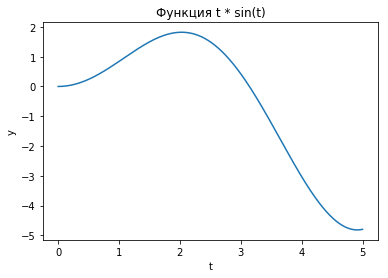

In [63]:
a = 0
x1 = 0
x2 = 5
eps = 1e-8
def f(t):
    return t * np.sin(t)

x = np.linspace(a, x2, 1e5)
plt.plot(x, f(x))
plt.title('Функция t * sin(t)')
plt.xlabel('t')
plt.ylabel('y');

/Users/strizh78/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


CPU times: user 43.5 ms, sys: 4.85 ms, total: 48.4 ms
Wall time: 29.4 ms


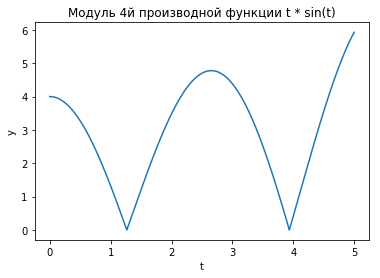

In [64]:
%%time
# def Simpson(f, a, b, h)

def der4_f(t):
    return t * np.sin(t) - 4 * np.cos(t)
## 4я производная = t * sin(t) - 4 cos(t)
x = np.linspace(a, x2, 1e5)
plt.plot(x, abs(x * np.sin(x) - 4 * np.cos(x)))
plt.title('Модуль 4й производной функции t * sin(t)')
plt.xlabel('t')
plt.ylabel('y');

In [51]:
def Simpson(f, a, b, h):
    '''Вычисляет значение интеграла функции f(x) на отрезке [a, b] методом Симпсона
    h - шаг
    Возвращает значение интеграла'''
    ct = round((b - a) / h) + 1
    if ct % 2:
        ct += 1
    x = np.linspace(a, b, ct)
    res = 0
    for i in range(x.shape[0] - 1):
        res += h / 6. * (f(x[i]) + 4 * f((x[i] + x[i + 1]) /2.) + f(x[i + 1]))
    return res

In [65]:
X = np.linspace(x1, x2, 100)
res = []
M4 = abs(der4_f(0))
t_max = 2.65366
for x in X:
#     print (x)
    if x < t_max:
        M4 = max(M4, abs(der4_f(x)))
#         print (M4)
        h_s = (x - a)
        if h_s == 0:
            h_s += eps
#         print (h_s)
        while M4 * (x - a) * h_s**4 / 2880. >= eps:
            h_s /= 2.
#             print (h_s)
    else:
        M4 = max(M4, abs(der4_f(t_max)), abs(der4_f(x)))
        h_s = (x - a)
        while M4 * (x - a) * h_s**4 / 2880. >= eps:
            h_s /= 2.
    res.append(Simpson(f, a, x, h_s))
res[:10]

/Users/strizh78/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


[0.0,
 4.293068101614194e-05,
 0.0005147792299774199,
 0.0017351633118617214,
 0.0034213661928239932,
 0.006667008937151711,
 0.010339419720237268,
 0.01636409258062524,
 0.024333198591168982,
 0.03449558349577159]

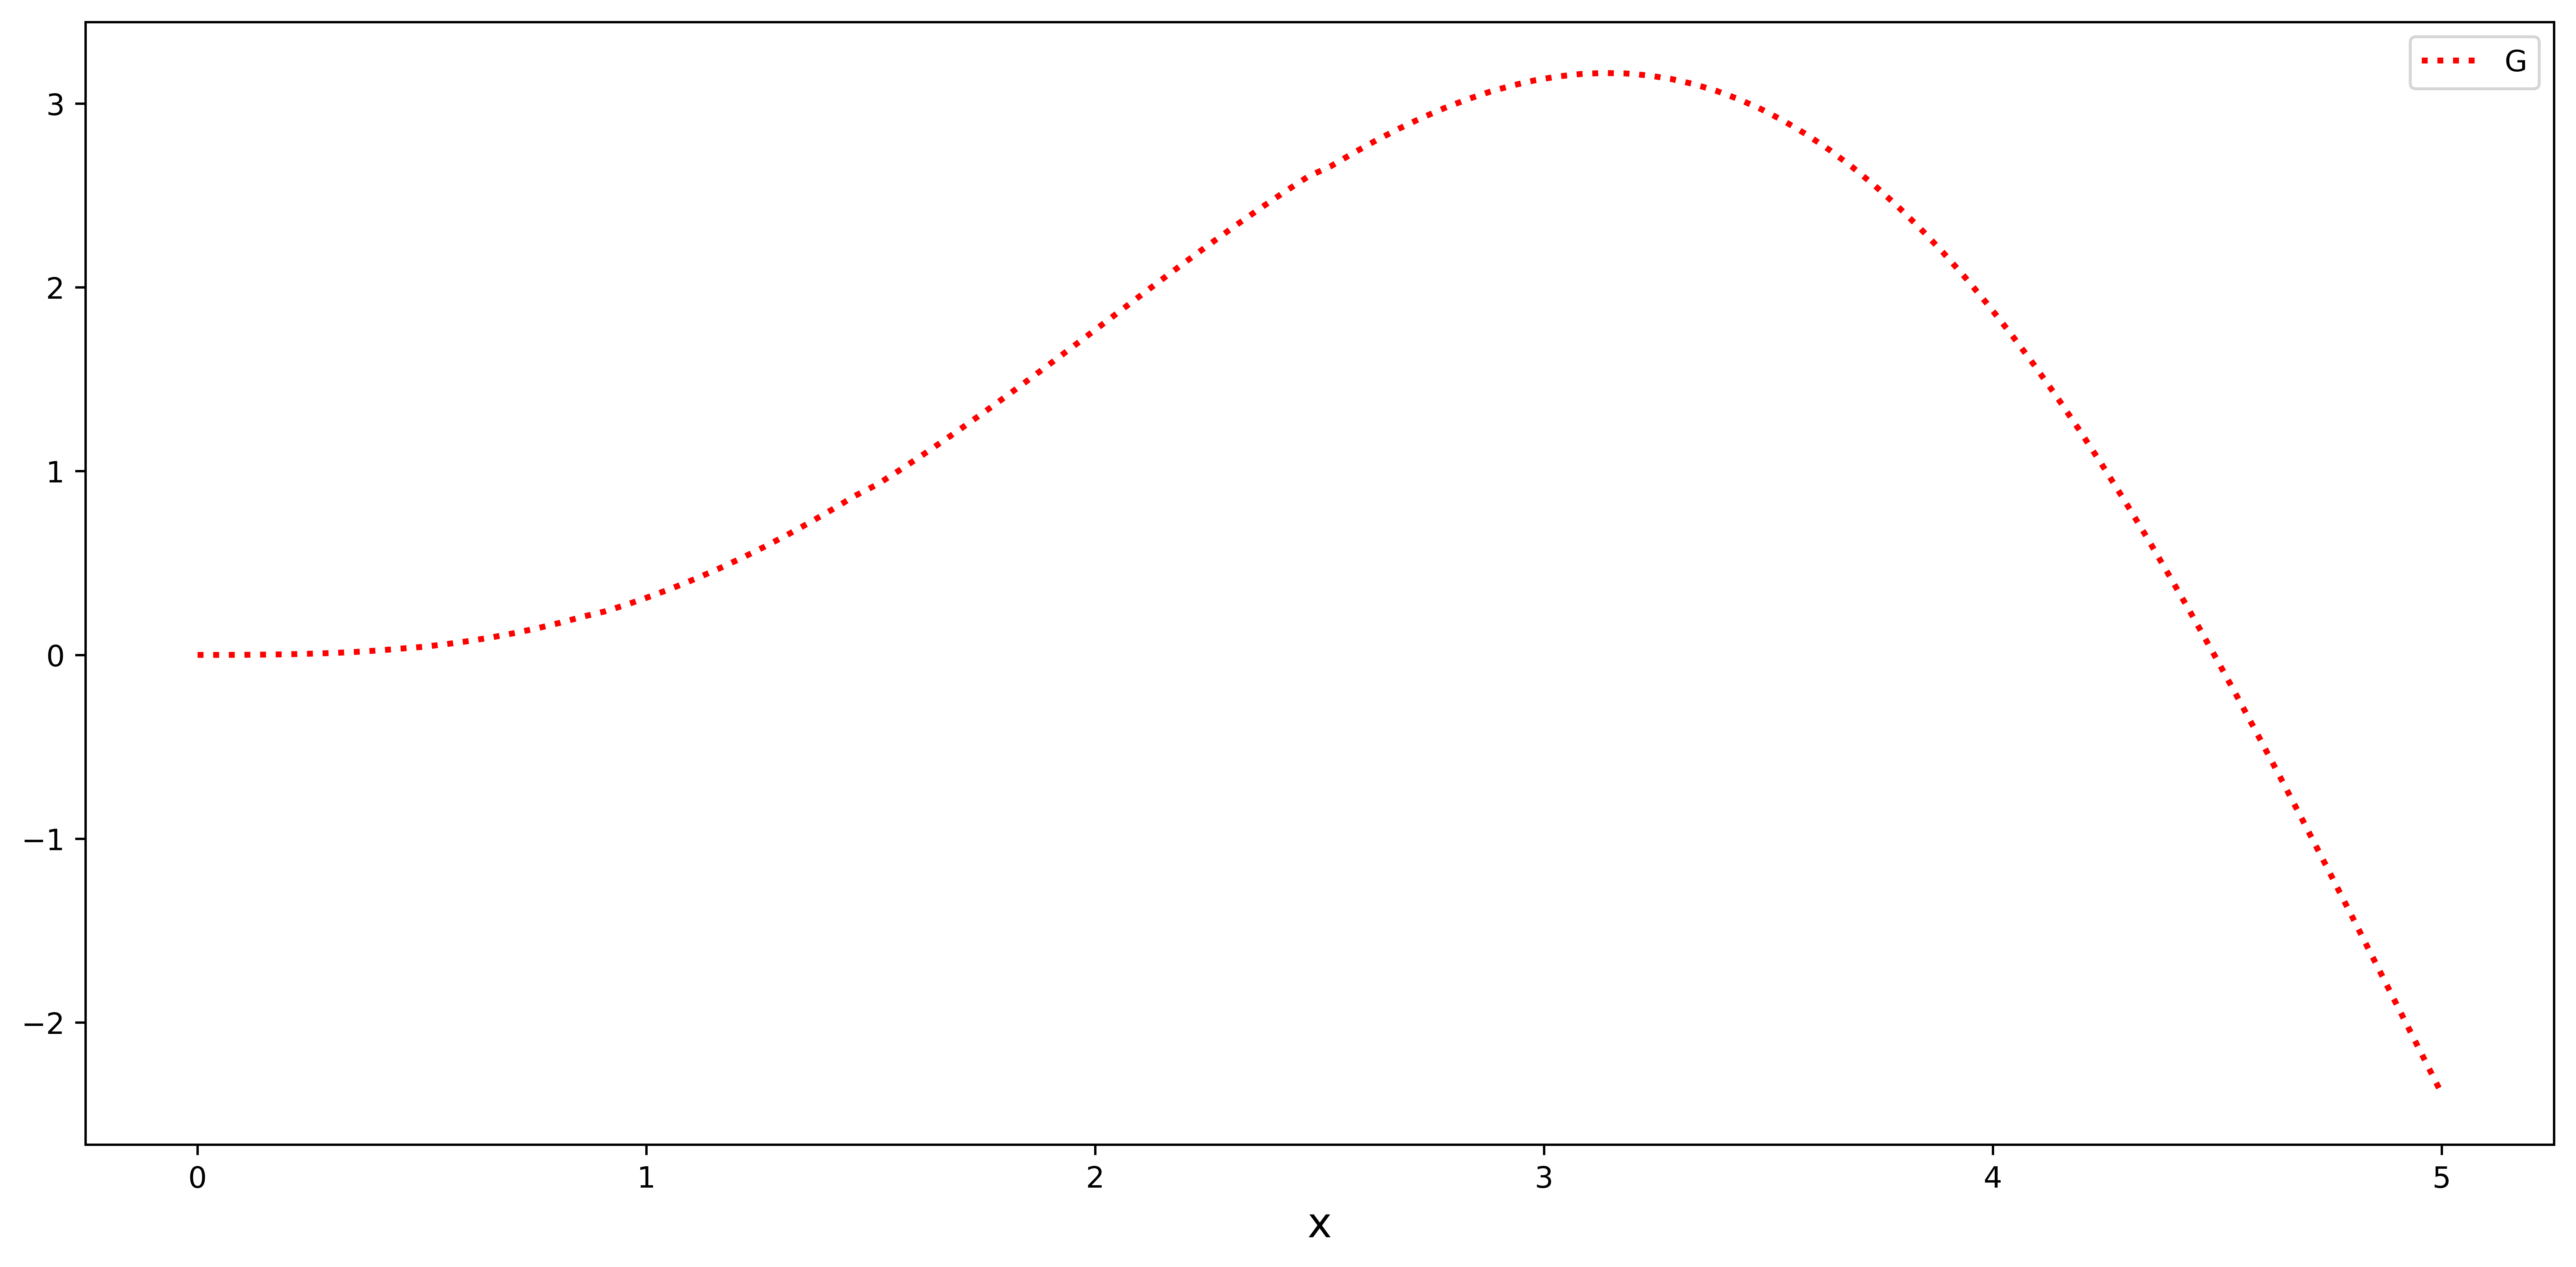

In [62]:
plt.figure(figsize = (15, 7), dpi = 800)
plt.plot(X, res, ':', lw = 2, c = 'red')
plt.legend("G(x)")
plt.xlabel("x", fontsize = 14);

# Задача 6.6.25

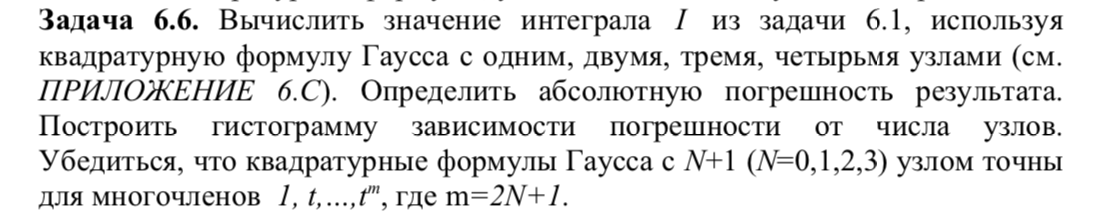

In [66]:
Image("l6t4.png")

In [67]:
A = [[2], # 1 узел
     [1, 1], # 2 узла
     [0.55555555555556, 0.88888888888888, 0.55555555555556], # 3 узла 
     [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]# 4 узла
t = [[0],
     [-0.577350269189626, 0.577350269189626],
     [-0.77459666929954, 0, 0.77459666929954],
     [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]

In [91]:
# это копипаста из 1го задания:
a, b = 1, 1.44
c = np.array([2.7, 2.4, 4.5, -3.2, 6.6, 2.4])

def P_n(x, c):
#     print (np.sum([c[i] * x**i for i in range(c.shape[0])]))
    return np.sum([c[i] * x**i for i in range(c.shape[0])])
print (P_n(1, c))

15.4


In [92]:
def Gauss(f, c, a, b, A, t):
    '''Функция вычисляет приближенное значение методом Гаусса
    f - функция
    a, b - пределы интегрирования
    n - число узлов
    '''
    sum_ = np.sum(np.array([A[i] * f((a + b) / 2 + (b - a) / 2. * t[i], c) for i in range(len(A))]))
    return (b - a) / 2. * sum_

In [96]:
errors = []
for i in range(0, 4):
    res_gauss = Gauss(P_n, c = c, a = a, b = b, A = A[i], t = t[i])
    res_true = 12.835
    print ('Полученный результат с числом узлов', i + 1, ' = ', res_gauss)
    print ('Абсолютная погрешность результата', abs(res_gauss - res_true))
    errors.append(abs(res_gauss - res_true))

Полученный результат с числом узлов 1  =  12.154029398579196
Абсолютная погрешность результата 0.680970601420805
Полученный результат с числом узлов 2  =  12.833028677427196
Абсолютная погрешность результата 0.0019713225728050787
Полученный результат с числом узлов 3  =  12.834974688973134
Абсолютная погрешность результата 2.5311026867314013e-05
Полученный результат с числом узлов 4  =  12.834974688870396
Абсолютная погрешность результата 2.5311129604688176e-05


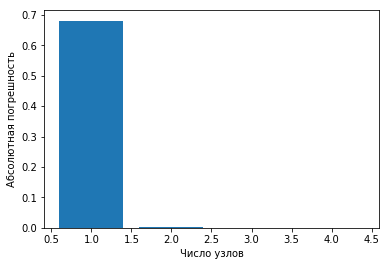

In [99]:
plt.bar([1, 2, 3, 4], errors)
plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность");

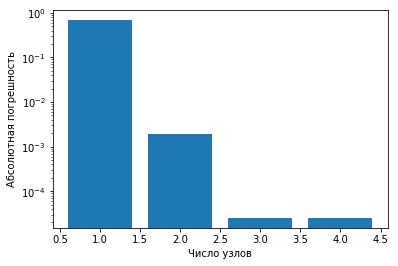

In [100]:
plt.bar([1, 2, 3, 4], errors)
plt.yscale('log')
plt.xlabel("Число узлов")
plt.ylabel("Абсолютная погрешность");

In [115]:
for N in range(0, 4):
    m = 2 * N + 1
    print ('N = ', N + 1)
    for j in range(0, m + 1):
        c = [0] * j
        c.append(1)
        c = np.array(c)
        print (c)
        res_true = (b**(j + 1) - a**(j + 1)) / (j + 1)
        error = abs(Gauss(P_n, c = c, a = a, b = b, A = A[N], t = t[N]) - res_true)
        print ('\t многочлен степени ', j, ': ошибка = ', error)

N =  1
[1]
	 многочлен степени  0 : ошибка =  0.0
[0 1]
	 многочлен степени  1 : ошибка =  0.0
N =  2
[1]
	 многочлен степени  0 : ошибка =  0.0
[0 1]
	 многочлен степени  1 : ошибка =  0.0
[0 0 1]
	 многочлен степени  2 : ошибка =  1.1102230246251565e-16
[0 0 0 1]
	 многочлен степени  3 : ошибка =  0.0
N =  3
[1]
	 многочлен степени  0 : ошибка =  0.0
[0 1]
	 многочлен степени  1 : ошибка =  0.0
[0 0 1]
	 многочлен степени  2 : ошибка =  1.06403774680075e-12
[0 0 0 1]
	 многочлен степени  3 : ошибка =  3.894773392687512e-12
[0 0 0 0 1]
	 многочлен степени  4 : ошибка =  9.564793401750649e-12
[0 0 0 0 0 1]
	 многочлен степени  5 : ошибка =  1.9700685527368478e-11
N =  4
[1]
	 многочлен степени  0 : ошибка =  0.0
[0 1]
	 многочлен степени  1 : ошибка =  0.0
[0 0 1]
	 многочлен степени  2 : ошибка =  1.1102230246251565e-16
[0 0 0 1]
	 многочлен степени  3 : ошибка =  1.1102230246251565e-16
[0 0 0 0 1]
	 многочлен степени  4 : ошибка =  2.220446049250313e-16
[0 0 0 0 0 1]
	 многочлен степ

# Задание 6.9.25

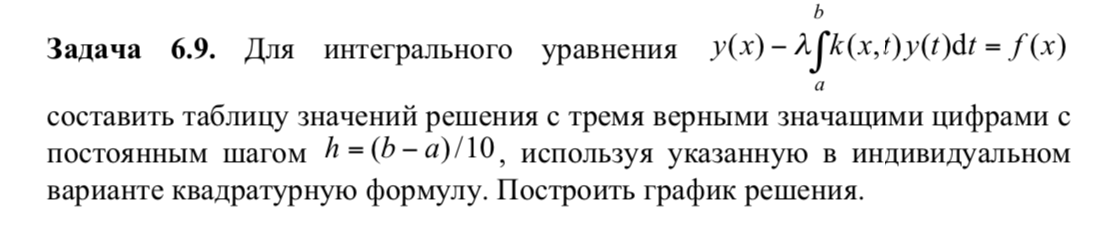

In [116]:
Image("l6t5.png")

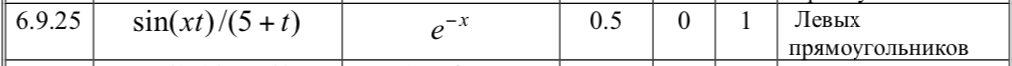

In [117]:
Image("l6t5v.png")

In [122]:
def k(x, t):
    return np.sin(x * t) / (5. + t)
def f(x):
    return np.exp(-x)
l = 0.5
a, b = 0, 1
h = (b - a) / 10.

$y(x) -\lambda h [\sum_{i=0}^{n-1}k(x,t_i)y(t_i) ] = f(x)$

$y_j -\lambda h ( \sum_{i=0}^{n-1}k(t_j,t_i)y_i ) = f_j$, где $j=0,...,n$

Запишем в коде:

In [143]:
X = np.arange(a, b + h, h)
n = X.shape[0]
B = np.array(f(X))
A = np.array([[-l * h * k(X[i], X[j]) for j in range(n)] for i in range (n)])
A[:, -1] = 0 # последний x никак не учтется
A += np.eye(n, n) # так как там будет еще слагаемое y_j перед -lh*integral_sum
Y = np.linalg.solve(A,B) # решаем
Y = np.round(Y, 3)
[print (i + 1, X[i], Y[i]) for i in range(Y.shape[0])] ;

1 0.0 1.0
2 0.1 0.907
3 0.2 0.823
4 0.30000000000000004 0.748
5 0.4 0.679
6 0.5 0.618
7 0.6000000000000001 0.562
8 0.7000000000000001 0.512
9 0.8 0.467
10 0.9 0.426
11 1.0 0.389


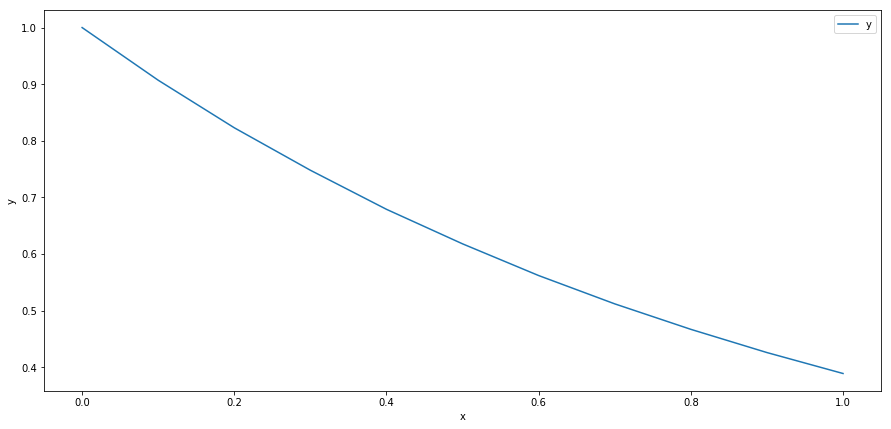

In [147]:
plt.figure(figsize=(15, 7))
plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend("y");